In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import cftime
import warnings
warnings.filterwarnings("ignore")

### reading and plotting data with xarray

In [2]:
pr_data = xr.open_dataset("processed_data/fldmean_data/ACCESS-CM2/pr_Amon_ACCESS-ESM1-5_ssp126_r1i1p1f1_gn_201501-210012_ymean_fldmean.nc")

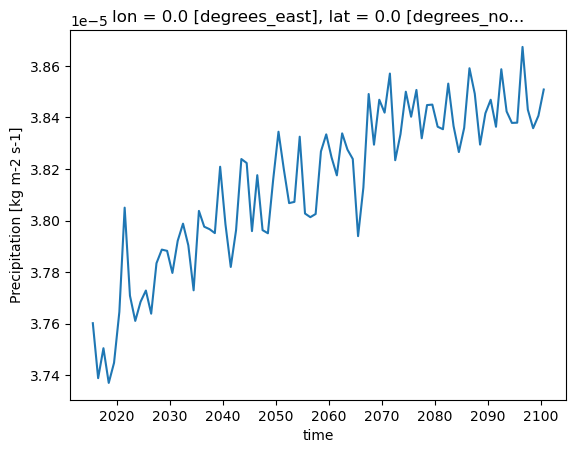

In [3]:
pr_data.pr.plot()

### Lets start reading with historical data from different models

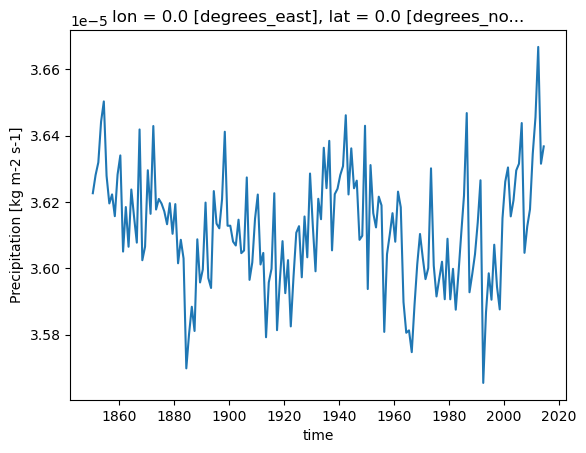

In [4]:
folder_path = "processed_data/fldmean_data/historical_data"

# List all files in the folder
file_list = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.startswith("pr")]
# Read each file into an xarray dataset
hist_data_pr_data = {}
datasets_keys = ["ACCESS-CM2","CAMS", "CESM2","CMCC", "MIROC6"]
for file, keys in zip(file_list,datasets_keys):
    ds = xr.open_dataset(file)
    # Check if the time variable is cftime
    # If it is, convert it to pandas datetime
    if isinstance(ds['time'].values[0], cftime.datetime):
        # Convert cftime to pandas datetime
        ds['time'] = ds.indexes['time'].to_datetimeindex()
    # Read the dataset into the dictionary
    hist_data_pr_data[keys] = ds

# List all files in the folder
file_list = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.startswith("tas")]
# Read each file into an xarray dataset
hist_data_tas_data = {}
for file, keys in zip(file_list,datasets_keys):
    ds = xr.open_dataset(file)
    # Check if the time variable is cftime
    # If it is, convert it to pandas datetime
    if isinstance(ds['time'].values[0], cftime.datetime):
        # Convert cftime to pandas datetime
        ds['time'] = ds.indexes['time'].to_datetimeindex()
    # Read the dataset into the dictionary
    hist_data_tas_data[keys] = ds

hist_data_pr_data["ACCESS-CM2"].pr.plot()  # Print the variables in the SSP126 dataset

### Preindustrial Average:

The preindustrial average temperature (1850–1900) is calculated for each model and stored in preindustrial_avg_temp.
Temperature Anomalies:

The temperature anomaly is calculated for each model by subtracting the preindustrial average from the temperature data.
Concatenation:

The temperature anomalies for all models are concatenated along a new dimension (model).
Mean and Percentiles:

The mean temperature anomaly is calculated using .mean(dim="model").
The 10th and 90th percentiles are calculated using np.quantile
Plotting:

The mean temperature anomaly is plotted as a line.
The 10th and 90th percentile spread is plotted as a shaded region using

In [5]:
# Calculate the preindustrial average temperature (1850–1900) for each model
preindustrial_avg_temp = {}
for model, ds in hist_data_tas_data.items():
    # Select the preindustrial time range
    preindustrial_period = ds.sel(time=slice("1850-01-01", "1900-12-31"))
    # Calculate the mean temperature for the preindustrial period
    preindustrial_avg_temp[model] = preindustrial_period['tas'].mean()



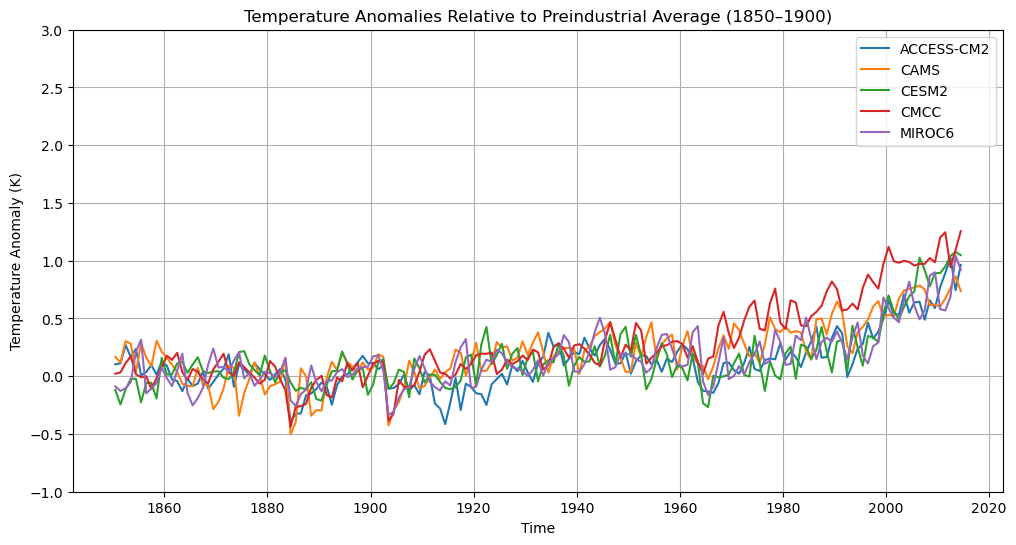

In [7]:
# Plot temperature anomalies (relative to preindustrial average) for each model
plt.figure(figsize=(12, 6))
for model, ds in hist_data_tas_data.items():
    # Calculate temperature anomaly
    temp_anomaly = ds['tas'] - preindustrial_avg_temp[model]
    # Plot the temperature anomaly
    temp_anomaly.plot(label=f"{model}")

plt.title("Temperature Anomalies Relative to Preindustrial Average (1850–1900)")
plt.ylim(-1,3)
plt.xlabel("Time")
plt.ylabel("Temperature Anomaly (K)")
plt.legend()
plt.grid()
plt.show()

### plot mean anomaly and quantiles

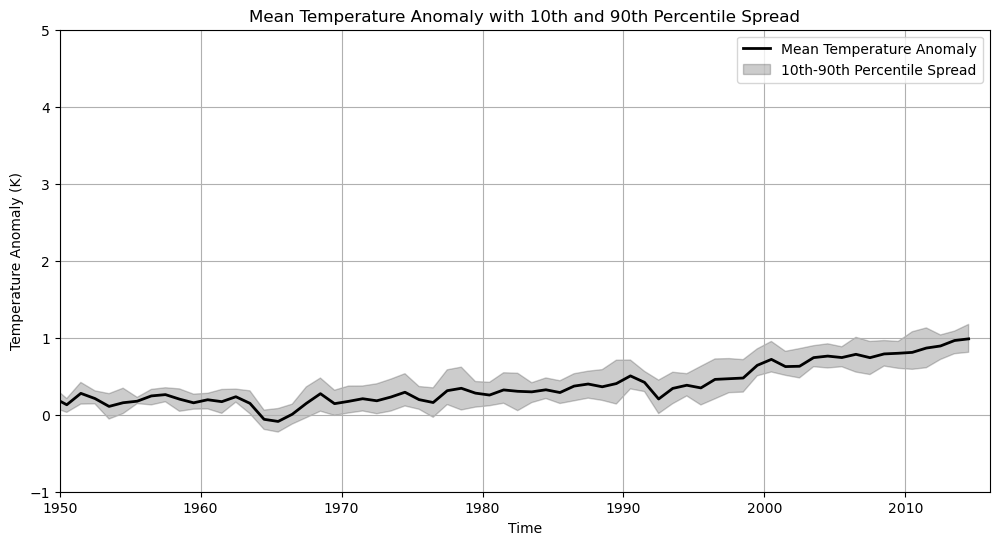

In [8]:
# Calculate the preindustrial average temperature (1850–1900) for each model
preindustrial_avg_temp = {}
for model, ds in hist_data_tas_data.items():
    # Select the preindustrial time range
    preindustrial_period = ds.sel(time=slice("1850-01-01", "1900-12-31"))
    # Calculate the mean temperature for the preindustrial period
    preindustrial_avg_temp[model] = preindustrial_period['tas'].mean()

# Calculate temperature anomalies for each model
temp_anomalies = []
for model, ds in hist_data_tas_data.items():
    # Calculate temperature anomaly
    temp_anomaly = ds['tas'] - preindustrial_avg_temp[model]
    temp_anomalies.append(temp_anomaly)

# Concatenate temperature anomalies across models
#temp_anomalies_concat = xr.concat(temp_anomalies, dim="model")

# Calculate mean and percentiles
mean_temp_anomaly = np.mean(temp_anomalies,axis=0)
p10_temp_anomaly = np.quantile(temp_anomalies,0.1,axis=0)
p90_temp_anomaly = np.quantile(temp_anomalies,0.9,axis=0)

# Plot the mean temperature anomaly with 10th and 90th percentile spread
plt.figure(figsize=(12, 6))
# Plot mean temperature anomaly
#mean_temp_anomaly.plot(label="Mean Temperature Anomaly", color="k",linewidth=3)
plt.plot(temp_anomaly['time'], mean_temp_anomaly.squeeze(), label="Mean Temperature Anomaly", color="k", linewidth=2)
# Add shaded region for 10th and 90th percentiles
plt.fill_between(
    temp_anomaly['time'].values,
    p10_temp_anomaly.squeeze(),
    p90_temp_anomaly.squeeze(),
    color="black",
    alpha=0.2,
    label="10th-90th Percentile Spread"
)
plt.ylim(-1, 5)
plt.xlim(pd.Timestamp("1950-01-01"), pd.Timestamp("2015-12-31"))
plt.title("Mean Temperature Anomaly with 10th and 90th Percentile Spread")
plt.xlabel("Time")
plt.ylabel("Temperature Anomaly (K)")
plt.legend()
plt.grid()
plt.show()

### Lets read scenarios data for ACCESS model

In [9]:
folder_path = "processed_data/fldmean_data/ACCESS-CM2"

# List all files in the folder
file_list = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.startswith("pr")]
# Read each file into an xarray dataset
ACCESS_CM2_pr_data = {}
datasets_keys = ["SSP126", "SSP245", "SSP370", "SSP585"]
for file, keys in zip(file_list,datasets_keys):
    ACCESS_CM2_pr_data[keys] = xr.open_dataset(file)


# List all files in the folder
file_list = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.startswith("tas")]
# Read each file into an xarray dataset
ACCESS_CM2_tas_data = {}
for file, keys in zip(file_list,datasets_keys):
    ACCESS_CM2_tas_data[keys] = xr.open_dataset(file)


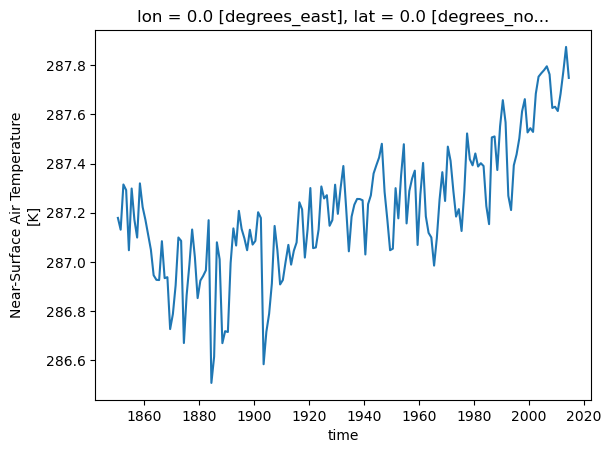

In [165]:
hist_data_tas_data["CAMS"].tas.plot()  # Print the variables in the SSP126 dataset

## Plotting different scenarios

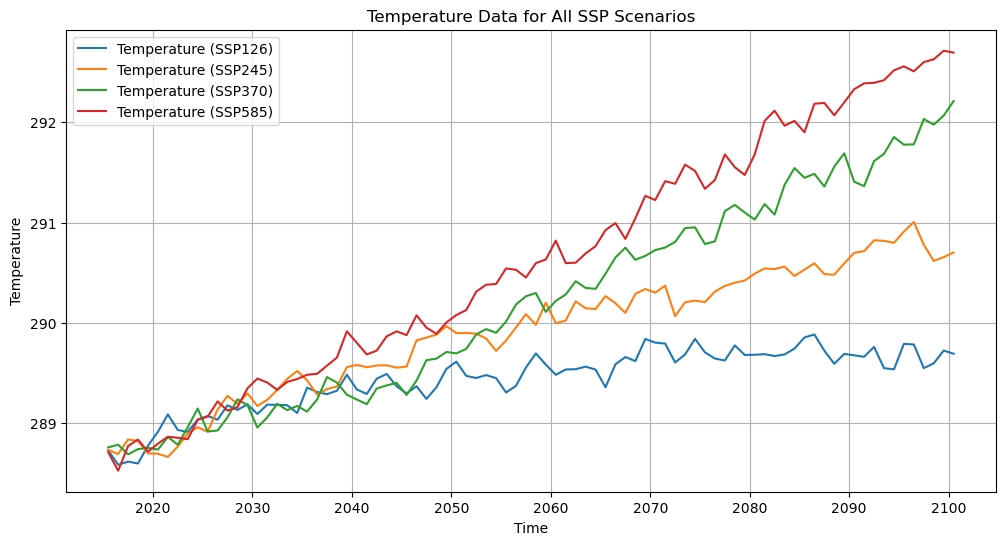

In [12]:

# Plot temperature data for all SSP scenarios in the same graph
plt.figure(figsize=(12, 6))
for key, dataset in ACCESS_CM2_tas_data.items():
    dataset['tas'].plot(label=f"Temperature ({key})")
plt.title("Temperature Data for All SSP Scenarios")
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.legend()
plt.grid()
plt.show()

### reading all scenarios from different models

In [13]:
# List of folders to process
folders = ["ACCESS-CM2","CAMS", "CMCC", "GFDL-ESM4", "MIROC6"]

# Dataset keys for SSP scenarios
datasets_keys = ["SSP126", "SSP245", "SSP370", "SSP585"]

# Dictionary to store data for each folder
all_pr_data = {}
all_tas_data = {}

for folder in folders:
    folder_path = f"processed_data/fldmean_data/{folder}"
    
    # Read precipitation data
    pr_file_list = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.startswith("pr")]
    pr_data = {}
    for file, key in zip(pr_file_list, datasets_keys):
        ds = xr.open_dataset(file)
        pr_data[key] = ds.sel(time=slice("2015-01-01T06:00:00", "2099-12-31T18:00:00"))  # Select time range
    all_pr_data[folder] = pr_data

    # Read temperature data
    tas_file_list = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.startswith("tas")]
    tas_data = {}
    for file, key in zip(tas_file_list, datasets_keys):
        ds = xr.open_dataset(file)
        tas_data[key] = ds.sel(time=slice("2015-01-01", "2099-12-31"))  # Select time range
    all_tas_data[folder] = tas_data

# Example: Access precipitation data for a specific folder and SSP scenario
print(all_pr_data["CAMS"]["SSP126"])

<xarray.Dataset> Size: 2kB
Dimensions:    (time: 85, bnds: 2, lon: 1, lat: 1)
Coordinates:
  * time       (time) object 680B 2015-07-01 06:00:00 ... 2099-07-01 06:00:00
  * lon        (lon) float64 8B 0.0
  * lat        (lat) float64 8B 0.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 1kB ...
    pr         (time, lat, lon) float32 340B ...
Attributes: (12/50)
    CDI:                    Climate Data Interface version 2.4.4 (https://mpi...
    Conventions:            CF-1.7 CMIP-6.2
    source:                 CAMS_CSM 1.0 (2016): \naerosol: none\natmos: ECHA...
    institution:            Chinese Academy of Meteorological Sciences, Beiji...
    activity_id:            ScenarioMIP
    branch_method:          Standard
    ...                     ...
    tracking_id:            hdl:21.14100/c2a187e3-03e5-4de4-84ef-359247714f61
    variable_id:            pr
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produce

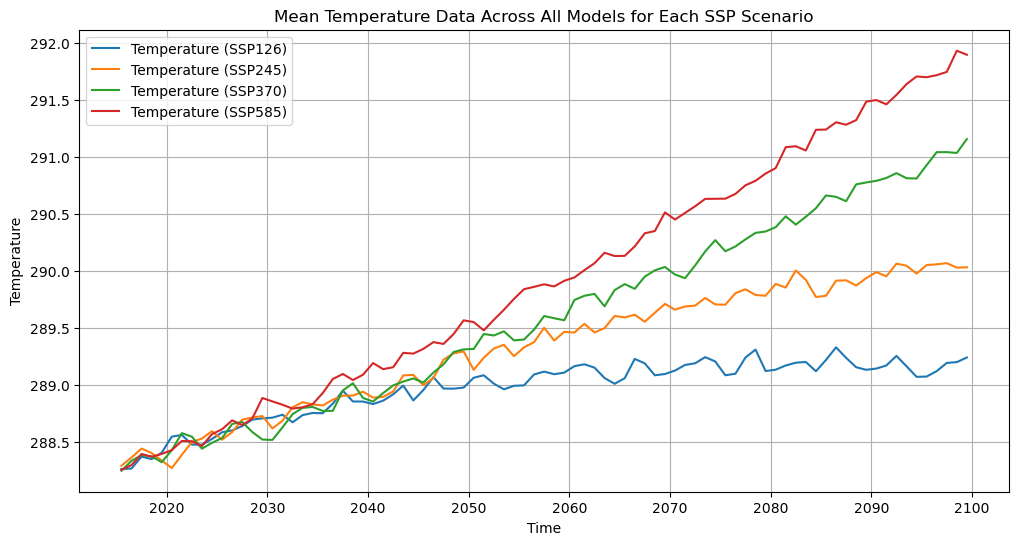

In [14]:
# Calculate the mean of temperature data across all models for each scenario
tas_mean_data = {}
for scenario in datasets_keys:  # Loop through SSP scenarios
    scenario_data = []
    for folder in all_tas_data:  # Loop through all models (folders)
        if scenario in all_tas_data[folder]:
            ds = all_tas_data[folder][scenario]
            if isinstance(ds['time'].values[0], cftime.datetime):   
                # Convert cftime to pandas datetime
                ds['time'] = ds.indexes['time'].to_datetimeindex()
            scenario_data.append(ds['tas'])
    # Take the mean across all models for the current scenario
    tas_mean_data[scenario] = xr.concat(scenario_data, dim="model").mean(dim="model")

# Plot the mean temperature data for all scenarios
plt.figure(figsize=(12, 6))
for scenario, data in tas_mean_data.items():
    data.plot(label=f"Temperature ({scenario})")
plt.title("Mean Temperature Data Across All Models for Each SSP Scenario")
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.legend()
plt.grid()
plt.show()

### Calculating mean surface temperature anomalies for hystorical and scenarios data and ploting it. Adding the quantiles for uncertainties.

In [15]:
preind_avg_temp = np.mean(list(preindustrial_avg_temp.values()))

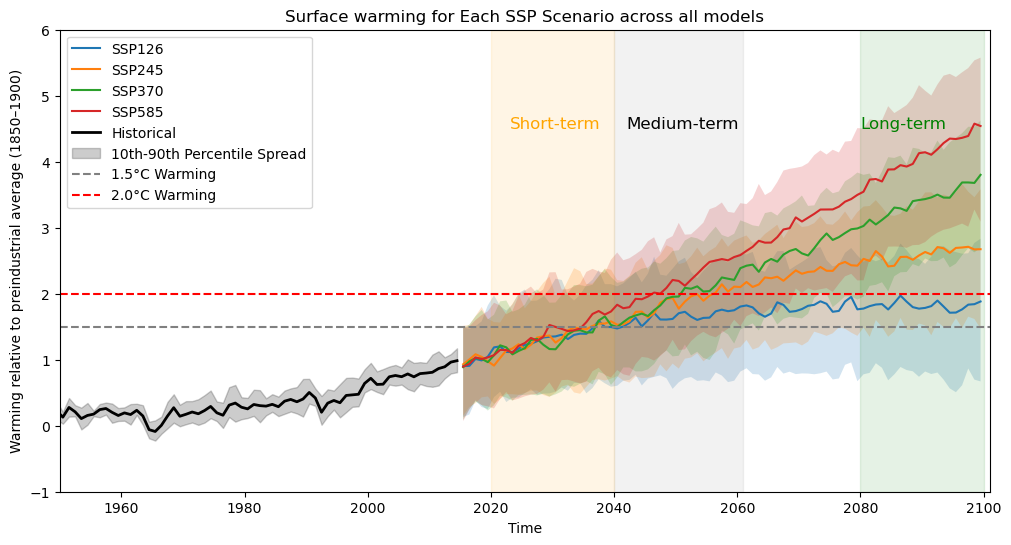

In [16]:
# Calculate the mean and percentiles of temperature anomalies data across all models for each scenario
tas_mean_data = {}
tas_percentiles = {}

for scenario in datasets_keys:  # Loop through SSP scenarios
    scenario_data = []
    for folder in all_tas_data:  # Loop through all models (folders)
        if scenario in all_tas_data[folder]:
            ds = all_tas_data[folder][scenario]
            if isinstance(ds['time'].values[0], cftime.datetime):   
                # Convert cftime to pandas datetime
                ds['time'] = ds.indexes['time'].to_datetimeindex()
            scenario_data.append(ds['tas']-preind_avg_temp)
    # Concatenate data across models
    concatenated = xr.concat(scenario_data, dim="model")
    # Calculate mean and percentiles
    tas_mean_data[scenario] = concatenated.mean(dim="model")
    tas_percentiles[scenario] = {
        "p10": concatenated.quantile(0.1, dim="model"),
        "p90": concatenated.quantile(0.9, dim="model")
    }

# Plot the mean temperature data with 10th and 90th percentiles as shaded regions
plt.figure(figsize=(12, 6))
for scenario, mean_data in tas_mean_data.items():
    # Plot the mean curve
    mean_data.plot(label=f"{scenario}")
    # Add shaded region for 10th and 90th percentiles
    plt.fill_between(
        mean_data['time'].values,  # Time values
        tas_percentiles[scenario]["p10"].values.squeeze(),  # Ensure 1D array for 10th percentile
        tas_percentiles[scenario]["p90"].values.squeeze(),  # Ensure 1D array for 90th percentile
        alpha=0.2#, label=f"{scenario} (10th-90th Percentile)"
    )
plt.plot(temp_anomaly['time'], mean_temp_anomaly.squeeze(), label="Historical", color="k", linewidth=2)
# Add shaded region for 10th and 90th percentiles
plt.fill_between(
    temp_anomaly['time'].values,
    p10_temp_anomaly.squeeze(),
    p90_temp_anomaly.squeeze(),
    color="black",
    alpha=0.2,
    label="10th-90th Percentile Spread"
)
plt.title("Surface warming for Each SSP Scenario across all models")
plt.axhline(y=1.5, color='gray', linestyle='--', label="1.5°C Warming")
plt.axhline(y=2.0, color='red', linestyle='--', label="2.0°C Warming")
plt.xlabel("Time")
plt.ylabel("Warming relative to preindustrial average (1850–1900)")
plt.axvspan(pd.Timestamp("2020-01-01"), pd.Timestamp("2039-12-31"), color='orange', alpha=0.1)
plt.text(pd.Timestamp("2023-01-01"), 4.5, "Short-term", fontsize=12, color='orange')
plt.axvspan(pd.Timestamp("2040-01-01"), pd.Timestamp("2060-12-31"), color='gray', alpha=0.1)
plt.text(pd.Timestamp("2042-01-01"), 4.5, "Medium-term", fontsize=12, color='black')
plt.axvspan(pd.Timestamp("2080-01-01"), pd.Timestamp("2099-12-31"), color='green', alpha=0.1)
plt.text(pd.Timestamp("2080-01-01"), 4.5, "Long-term", fontsize=12, color='green')
plt.ylim(-1, 6)
plt.xlim(pd.Timestamp("1950-01-01"), pd.Timestamp("2100-12-31"))
plt.legend()
plt.show()

### Animation of temperature change over the globe during this period

In [3]:
from matplotlib.animation import FuncAnimation
import cartopy.crs as ccrs
import cartopy
from functools import partial

### Reading yearly averaged files

In [47]:
#tas_access = xr.open_dataset("processed_data/ACCESS-CM2/tas_Amon_ACCESS-ESM1-5_ssp126_r1i1p1f1_gn_201501-210012_ymean.nc")
tas_access = xr.open_dataset("cmip6_data/ACCESS-CM2/tas_Amon_ACCESS-ESM1-5_ssp126_r1i1p1f1_gn_201501-210012.nc")

In [48]:
lat = tas_access.lat
lon = tas_access.lon
temp_acess_data = tas_access.tas

In [49]:
tas_access

<xarray.Dataset> Size: 115MB
Dimensions:    (time: 1032, bnds: 2, lat: 145, lon: 192)
Coordinates:
  * time       (time) datetime64[ns] 8kB 2015-01-16T12:00:00 ... 2100-12-16T1...
  * lat        (lat) float64 1kB -90.0 -88.75 -87.5 -86.25 ... 87.5 88.75 90.0
  * lon        (lon) float64 2kB 0.0 1.875 3.75 5.625 ... 354.4 356.2 358.1
    height     float64 8B ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 17kB ...
    lat_bnds   (lat, bnds) float64 2kB ...
    lon_bnds   (lon, bnds) float64 3kB ...
    tas        (time, lat, lon) float32 115MB ...
Attributes: (12/47)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    branch_method:          standard
    branch_time_in_child:   60265.0
    branch_time_in_parent:  60265.0
    creation_date:          2019-11-15T02:43:36Z
    ...                     ...
    variable_id:            tas
    variant_label:          r1i1p1f1
    version:                v20191115
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/db9ad393-222e-4462-831c-dcfb48059ad9
    license:                CMIP6 model data produced by CSIRO is licensed un...

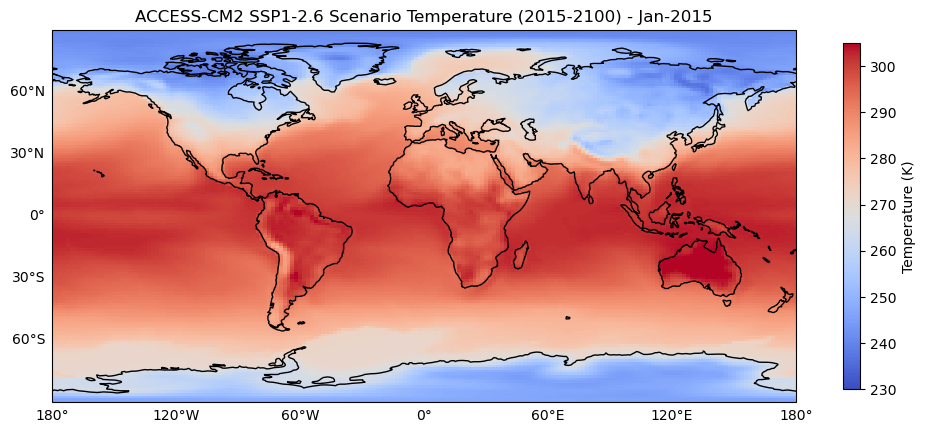

In [63]:
fig = plt.figure(figsize=(12, 6))
crs = ccrs.PlateCarree()

ax = plt.axes(projection=crs)
mesh =ax.pcolormesh(lon, lat, temp_acess_data[0,:,:],vmin=230, vmax=305,cmap= "coolwarm")
cbar = plt.colorbar(mesh, ax=ax, orientation="vertical", label="Temperature (K)", shrink=0.75, pad=0.05)
ax.coastlines()
ax.set_title(f"ACCESS-CM2 SSP1-2.6 Scenario Temperature (2015-2100) - Jan-2015")
gl = ax.gridlines(crs=crs, draw_labels=True,
                   linewidth=0.1, color='gray', alpha=0.01, linestyle='-.')  
gl.top_labels=False   # suppress top labels
gl.right_labels=False # suppress right labels   

Months = ["","Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

def plot_frame(frame):
    #tas_access.tas.isel(time=frame).plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm', cbar_kwargs={'label': 'Temperature (K)'})
    mesh.set_array(temp_acess_data[frame,:,:])
    ax.set_title(f"ACCESS-CM2 SSP1-2.6 Scenario Temperature (2015-2100) - {Months[tas_access.time[frame].dt.month.item()]}-{tas_access.time[frame].dt.year.item()}")
ani = FuncAnimation(fig, plot_frame, frames=len(tas_access.tas.time), repeat=True)


In [64]:
ani.save('temperature_anomaly_animation.gif', writer='imagemagick', fps=10)

MovieWriter imagemagick unavailable; using Pillow instead.
